In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

In [2]:
# set plotting style
sns.set_theme()
rc('font',**{'family':'serif', 'serif':['Times'], 'size': 9})
rc('text', usetex=True)

## Load example data (for Figure 3)

In [3]:
sizes = [1, 5, 10, 20, 50, 100]
svds = []
for size in sizes:
    # load example singular values computed by test_collapse.py
    # if you're plotting something else, this path would have to change
    singular_values = torch.load(f"data/resnet18_{size}percent/imagenet/train_reprs_e0_svd.pt")["stds"]
    svds.append(singular_values.numpy())

## Plot singular values

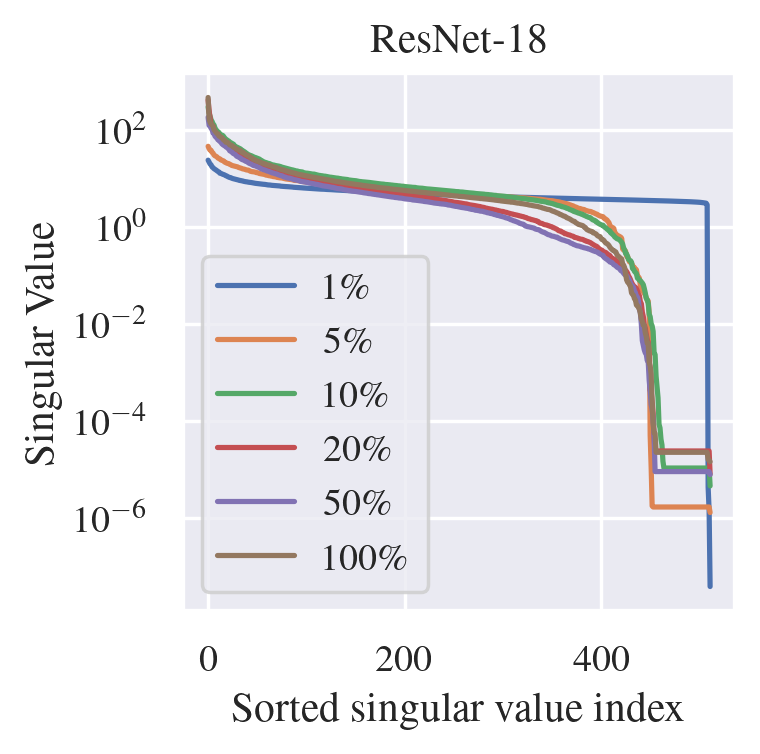

In [4]:
plt.figure(figsize=(3 * 0.95, 3* 0.95), dpi=250)
for size, svd in zip(sizes, svds):
    plt.plot(svd, label=f"{size}\%")
plt.xlabel("Sorted singular value index")
plt.ylabel('Singular Value')
plt.title('ResNet-18')
plt.yscale('log')
plt.legend()
plt.show()

## Plot normalized singular values

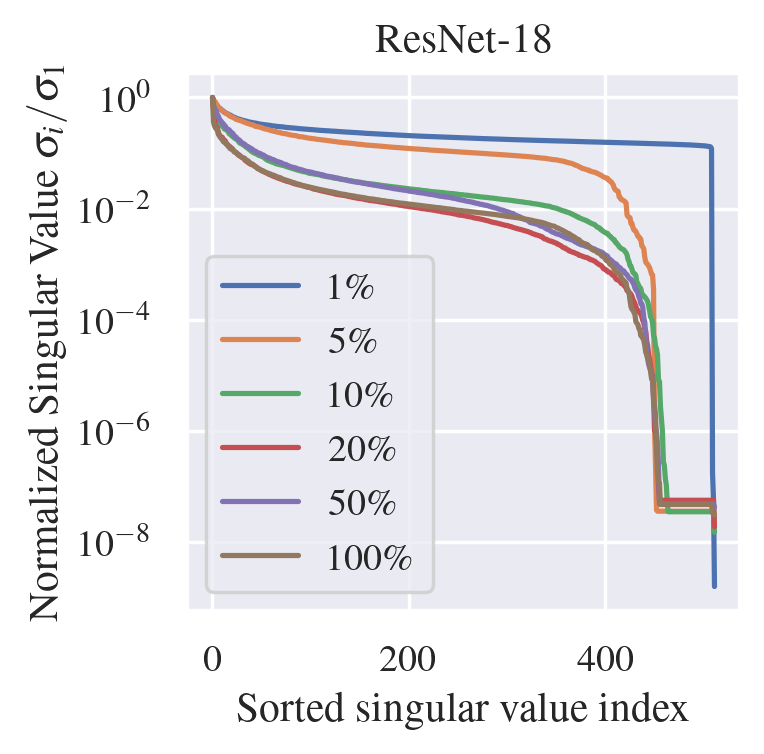

In [5]:
plt.figure(figsize=(3 * 0.95, 3* 0.95), dpi=250)
for size, svd in zip(sizes, svds):
    plt.plot(svd / svd[0], label=f"{size}\%")
plt.xlabel("Sorted singular value index")
plt.ylabel('Normalized Singular Value $\sigma_i / \sigma_1$')
plt.title('ResNet-18')
plt.yscale('log')
plt.legend()
plt.show()

## Plot cumulative explained variance

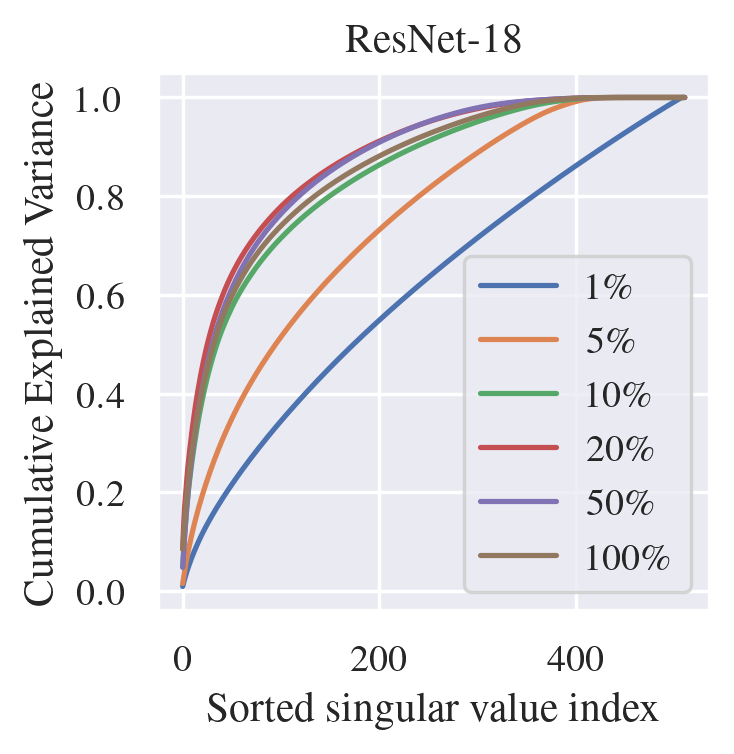

In [6]:
plt.figure(figsize=(3 * 0.95, 3* 0.95), dpi=250)
for size, svd in zip(sizes, svds):
    plt.plot(np.cumsum(svd) / svd.sum(), label=f"{size}\%")
plt.xlabel("Sorted singular value index")
plt.ylabel('Cumulative Explained Variance')
plt.title('ResNet-18')
plt.legend()
plt.show()

## Plot AUC

In [7]:
def auc(singular_values):
    # Equation 2 from https://arxiv.org/abs/2209.15007
    explvar = np.cumsum(singular_values) / singular_values.sum()
    return explvar.sum() / len(explvar)

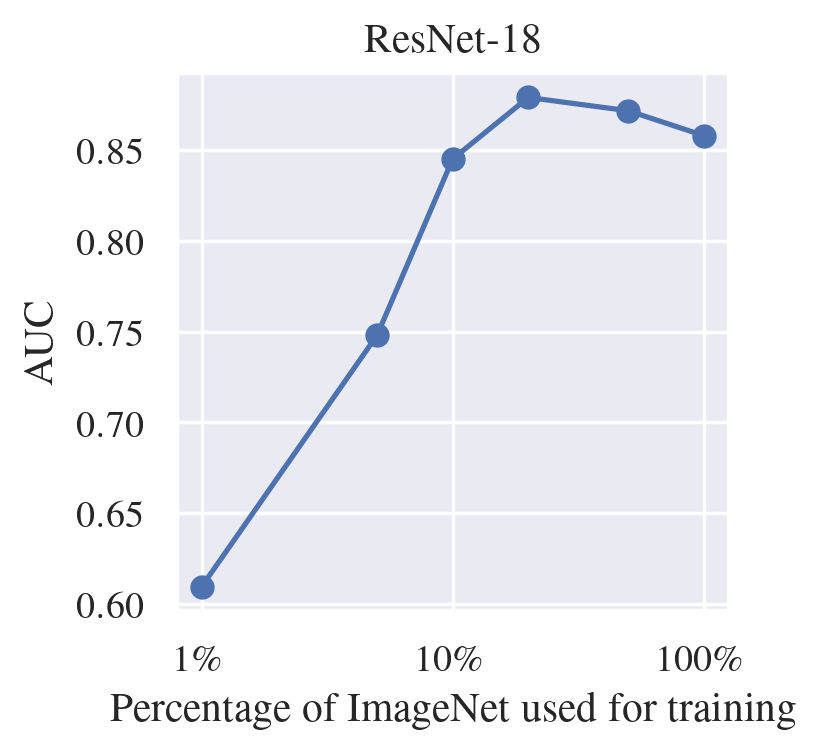

In [8]:
aucs = [auc(svd) for svd in svds]
plt.figure(figsize=(3 * 0.95, 3* 0.95), dpi=250)
plt.plot(sizes, aucs, marker='o')
plt.xlabel("Percentage of ImageNet used for training")
plt.ylabel('AUC')
plt.xscale('log')
plt.xticks([1, 10, 100], ['1\%', '10\%', '100\%'])
plt.title('ResNet-18')
plt.show()